In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['patch.force_edgecolor'] = True
sns.set_style("darkgrid")

In [2]:
movies = pd.read_csv("C:\\Users\\Priyaranjan\\Desktop\\Python A-Z\\Sec 6 Movie Ratings\\Movie-Ratings.csv")

In [3]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [4]:
len(movies)

559

In [5]:
movies.columns = ["Film", "Genre", "CriticRatings", "AudienceRatings","BudgetMillion","ReleaseYear"]

In [6]:
movies.head()

,Film,Genre,CriticRatings,AudienceRatings,BudgetMillion,ReleaseYear
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null object
Genre              559 non-null object
CriticRatings      559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillion      559 non-null int64
ReleaseYear        559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [8]:
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.ReleaseYear = movies.ReleaseYear.astype('category')

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null category
Genre              559 non-null category
CriticRatings      559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillion      559 non-null int64
ReleaseYear        559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


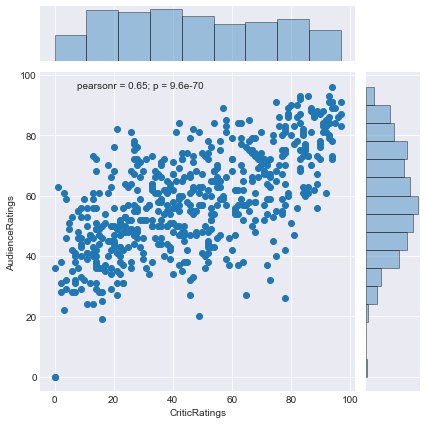

In [10]:
viz1 = sns.jointplot(data = movies, x='CriticRatings', y = 'AudienceRatings')

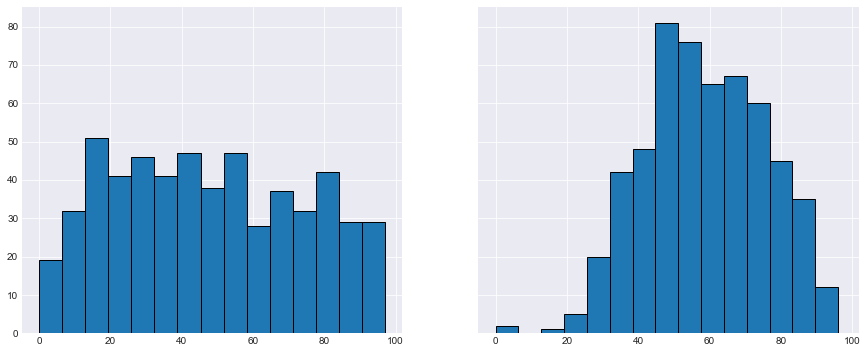

In [20]:
f, ax = plt.subplots(1,2,figsize = (15,6), sharex=True, sharey=True)
ax[0].hist(movies.CriticRatings, bins=15)
ax[1].hist(movies.AudienceRatings, bins=15)
plt.show()

In [21]:
#Critics ratings are more uniform as compared to Audience.
#Audience ratings follow a normal distribution as there is no criteria wrt how audience rate a movie. It's just natural emotion/intution
#But, when critics looks at specific criteria, normal distribution is lost

In [22]:
#-----------------------

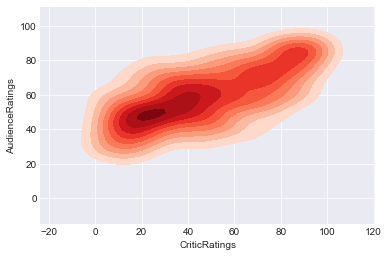

In [24]:
#KDE plot

viz1 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, shade = True, shade_lowest  =False, cmap  ='Reds')

[(-20, 170)]

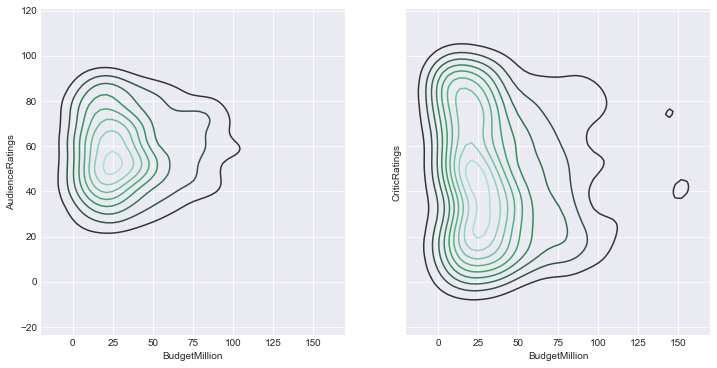

In [25]:
#Comapring Audience and Critic Rating side by side with Budget

f, ax = plt.subplots(1,2,figsize = (12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRatings, ax = ax[0])
k2 = sns.kdeplot(movies.BudgetMillion, movies.CriticRatings, ax = ax[1])
k1.set(xlim = (-20,170))

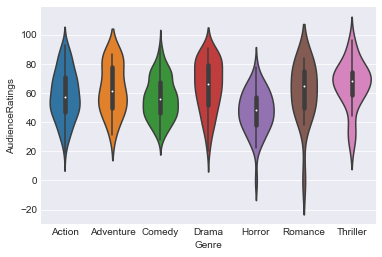

In [26]:
viz2 = sns.violinplot(data = movies, x = 'Genre', y='AudienceRatings')

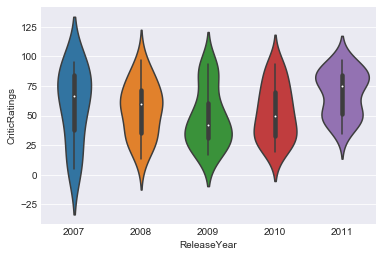

In [27]:
viz1 = sns.violinplot(data = movies[movies.Genre == 'Drama'], x = 'ReleaseYear', y='CriticRatings')

In [28]:
#--------------------------------------
#Building a Dashboard
#----------------------------------

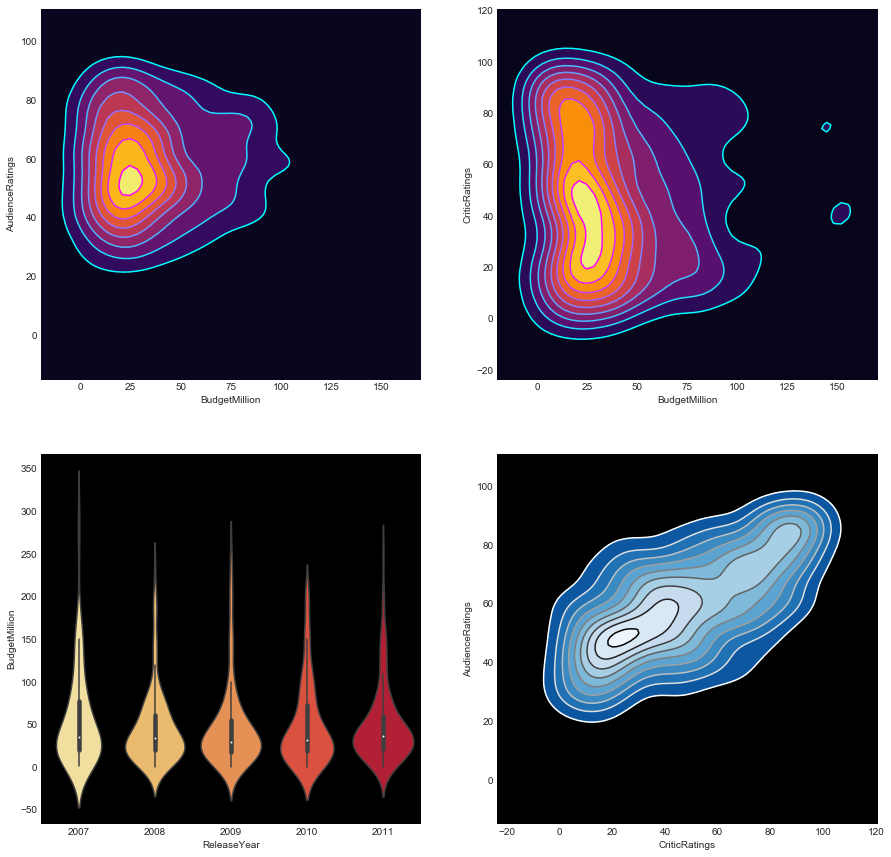

In [29]:
#Creating a dashboard to include few charts
sns.set_style("dark", {"axes.facecolor":"black"})
f, ax = plt.subplots(2,2, figsize = (15,15))

k1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRatings, ax = ax[0,0], \
                 shade = True, shade_lowest  =True, cmap  ='inferno')
k1b = sns.kdeplot(movies.BudgetMillion, movies.AudienceRatings, ax = ax[0,0], \
                 cmap  ='cool')

k2 = sns.kdeplot(movies.BudgetMillion, movies.CriticRatings, ax = ax[0,1], \
                 shade = True, shade_lowest  =True, cmap  ='inferno')
k2b = sns.kdeplot(movies.BudgetMillion, movies.CriticRatings, ax = ax[0,1], \
                 cmap  ='cool')

viz1 = sns.violinplot(data = movies, x = 'ReleaseYear', y='BudgetMillion', ax=ax[1,0], \
                     palette = 'YlOrRd')

viz2 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, \
                   shade = True, shade_lowest  =False, cmap  ='Blues_r', ax=ax[1,1])
viz2b = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, ax=ax[1,1], \
                   cmap = "gist_gray_r")

k1.set(xlim = (-20,170))
k2.set(xlim = (-20,170))
plt.show()

In [30]:
#-------------------------------------------------------------
#Thematic edits
#-------------------------------------------------------------

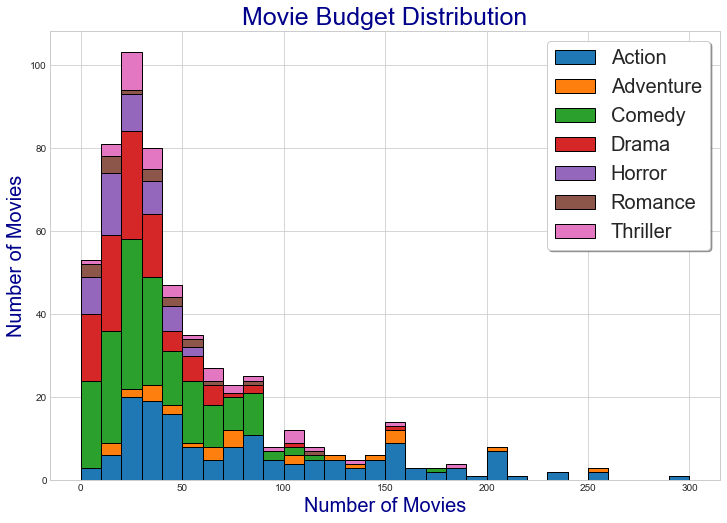

In [32]:
list1 = []
labels = []
for i in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == i].BudgetMillion)
    labels.append(i)
sns.set_style("whitegrid")
f, ax = plt.subplots()  
f.set_size_inches(12, 8.27)
h = plt.hist(list1, stacked=True, bins=30, rwidth=1, label = labels)
plt.title("Movie Budget Distribution", fontsize = 25, color = "DarkBlue")
plt.ylabel("Number of Movies", fontsize = 20, color = "DarkBlue")
plt.xlabel("Number of Movies", fontsize = 20, color = "DarkBlue")
plt.legend(prop = {"size":20}, frameon = True, fancybox = True, shadow = True, framealpha = 1)
plt.show()